<a href="https://colab.research.google.com/github/slimf1/ZZ3-DL/blob/main/02_PMC_2couches_etud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron multicouches et Keras

Définition d'un perceptron multicouches à deux couches cachées pour la classification de données MNIST


## MNIST 

La base de données MNIST (Mixed National Institute of Standards and Technology), est une base de données de chiffres manuscrits. C’est une base de données standard pour le test de nouveaux algorithmes de reconnaissance de ces chiffres. Elle est composée de 60000 images d’apprentissage et 10000 images de test. Les images en noir et blanc, normalisées centrées de 28 pixels de côté.

![mnist.png](./mnist.png)




# Import

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as tk
from tensorflow.keras import Sequential


from tensorflow.keras.layers import Input, Dense, Activation, Lambda
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

# Ajoutée (pour sparse) ""If you have two or more classes and  the labels are integers, the SparseCategoricalCrossentropy should be used. ""
#https://neptune.ai/blog/keras-loss-functions
from tensorflow.keras.layers import Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import tensorflow as tf

# Données

On charge ensuite les données MNIST. Les paramètres de la base sont récupérés (nombre d'exemples, de classes, taille de la rétine).

In [12]:
(x_train, y_train), (x_test, y_test) =tk.datasets.mnist.load_data()

num_examples = x_train.shape[0] 
num_test = x_test.shape[0]
num_input = x_train.shape[1]*x_train.shape[2]
num_classes = 10

img_size = x_train.shape[1] 
img_shape = (img_size, img_size)

x_train = x_train.reshape((num_examples, num_input))/255
x_test  = x_test.reshape((num_test, num_input))/255

# normalisation



print('Taille de la rétine : ',num_input)
print("Nombre d'exemples : ",num_examples)

y_train = tk.utils.to_categorical(y_train, num_classes)
y_test = tk.utils.to_categorical(y_test, num_classes)

print(x_train.shape)


Taille de la rétine :  784
Nombre d'exemples :  60000
(60000, 784)


# Réseau

## Paramètres du réseau

Dans un premier temps, on définit les paramètres du réseau : 
- 256 neurones cachés dans chaque couche cachée, 
- un apprentissage par batchs de taille 100
- 15 itérations pour l'apprentissage


In [13]:

lr = 0.001
num_epochs = 15
batch_size = 100

# Nombre de neurones sur les deux couches cachées
num_hidden_1 = 256 
num_hidden_2 = 256 

## Définition du réseau

On construit alors le modèle :
- le réseau
- la fonction de coût à optimiser : dans le cas d'un problème de classification, la fonction d'entropie croisée calculée entre la sortie théorique et la sortie calculée par le modèle est adéquate
- la méthode d'optimisation utilisée (descente de gradient) : ici, l'algorithme [ADAM](https://arxiv.org/abs/1412.6980) est utilisé

In [24]:

# Modèle #1 => bons résultats (99% acc) | categorical_crossentropy
# model = Sequential()
# model.add(Dense(784, input_dim=784, activation="relu"))
# model.add(Dense(10, activation='softmax'))

# Modèle #2
model = Sequential()
model.add(Input(shape=(784, ), batch_size=batch_size))
model.add(Dense(num_hidden_1, activation='relu'))
model.add(Dense(num_hidden_2, activation='relu'))
model.add(Dense(10, activation='softmax'))

#model.add(Flatten(input_shape=(28, 28)))
# model.add(Dense(num_hidden_1, activation="relu"))
# model.add(Dense(num_hidden_2, activation="tanh"))
# model.add(Flatten())
# model.add(Dense(10))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (100, 256)                200960    
_________________________________________________________________
dense_10 (Dense)             (100, 256)                65792     
_________________________________________________________________
dense_11 (Dense)             (100, 10)                 2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [25]:
opt = Adam(learning_rate=lr) # Rôle de l'optimizer par rapport à la fonction de perte ?

model.compile(
    optimizer=opt,
    loss="categorical_crossentropy",
    metrics=["acc"]
)

On entraîne le modèle

In [26]:

hist = model.fit(x_train, y_train, epochs=num_epochs) 

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2012 - acc: 0.9405
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0824 - acc: 0.9746
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0580 - acc: 0.9818
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0444 - acc: 0.9857
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0336 - acc: 0.9895
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0292 - acc: 0.9908
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0244 - acc: 0.9919
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0192 - acc: 0.9938
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0201 - acc: 0.9932
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0166 - acc: 0.9945
Epoch 11/15
1875/1875 [======

In [27]:
print("Précision ={0:5.3f} ".format(hist.history.get('acc')[-1]))

Précision =0.996 


Puis on l'évalue sur l'ensemble de test 

313/313 [==============================] - 1s 2ms/step - loss: 0.0358 - acc: 0.3130


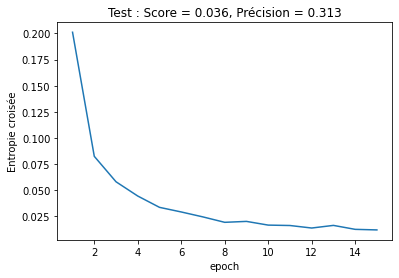

Nombre d'erreurs 203/10000




<Figure size 432x288 with 0 Axes>

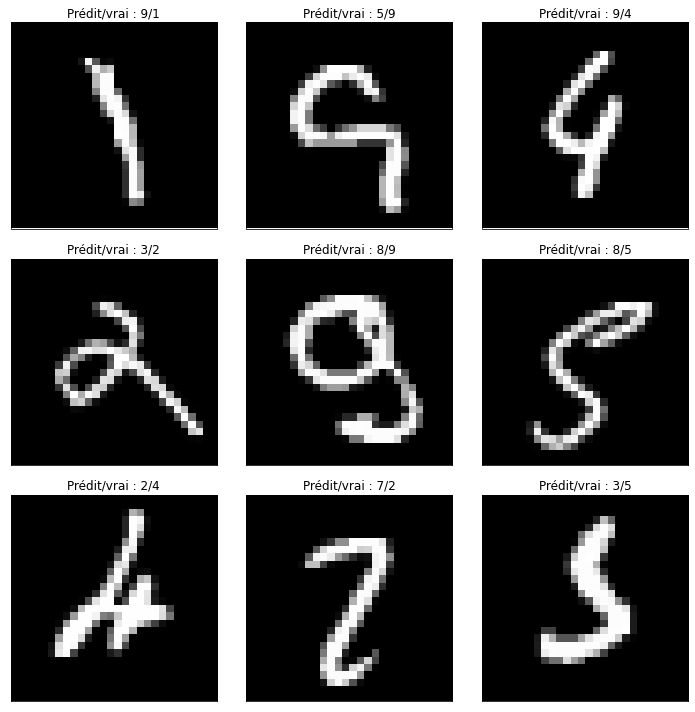

In [28]:
score = model.evaluate(x_test,y_test)

x = list(range(1,num_epochs+1))
l = hist.history['loss']
plt.subplots(1,1)
plt.xlabel('epoch')
plt.ylabel('Entropie croisée')
plt.title("Test : Score = {0:5.3f}, Précision = {1:5.3f}".format(score[0], score[1]))
plt.plot(x,l)
plt.show()
plt.tight_layout()

predicted_classes = np.argmax(model.predict(x_test), axis=-1)
y = np.argmax(y_test,axis=1)

incorrects = np.nonzero(predicted_classes != y)[0]
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrects[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title( "Prédit/vrai : {}/{}".format(predicted_classes[incorrects[i]], y[incorrects[i]]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
print("Nombre d'erreurs {}/{}\n\n".format(incorrects.size,y.size))
